# K Nearest Neighbours Algorithm From Scratch

### Importing The Data

In [5]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

,X1,X2,Y
0,4.382804,-1.790528,1.0
1,5.722804,3.491480,1.0
2,-9.581776,-9.525026,2.0
3,-8.946137,5.358916,3.0
4,-4.855221,5.659400,3.0
...,...,...,...
1995,2.248113,2.862375,1.0
1996,-9.024216,6.844519,3.0
1997,-7.786124,-3.975175,2.0
1998,-10.158596,-7.665052,2.0


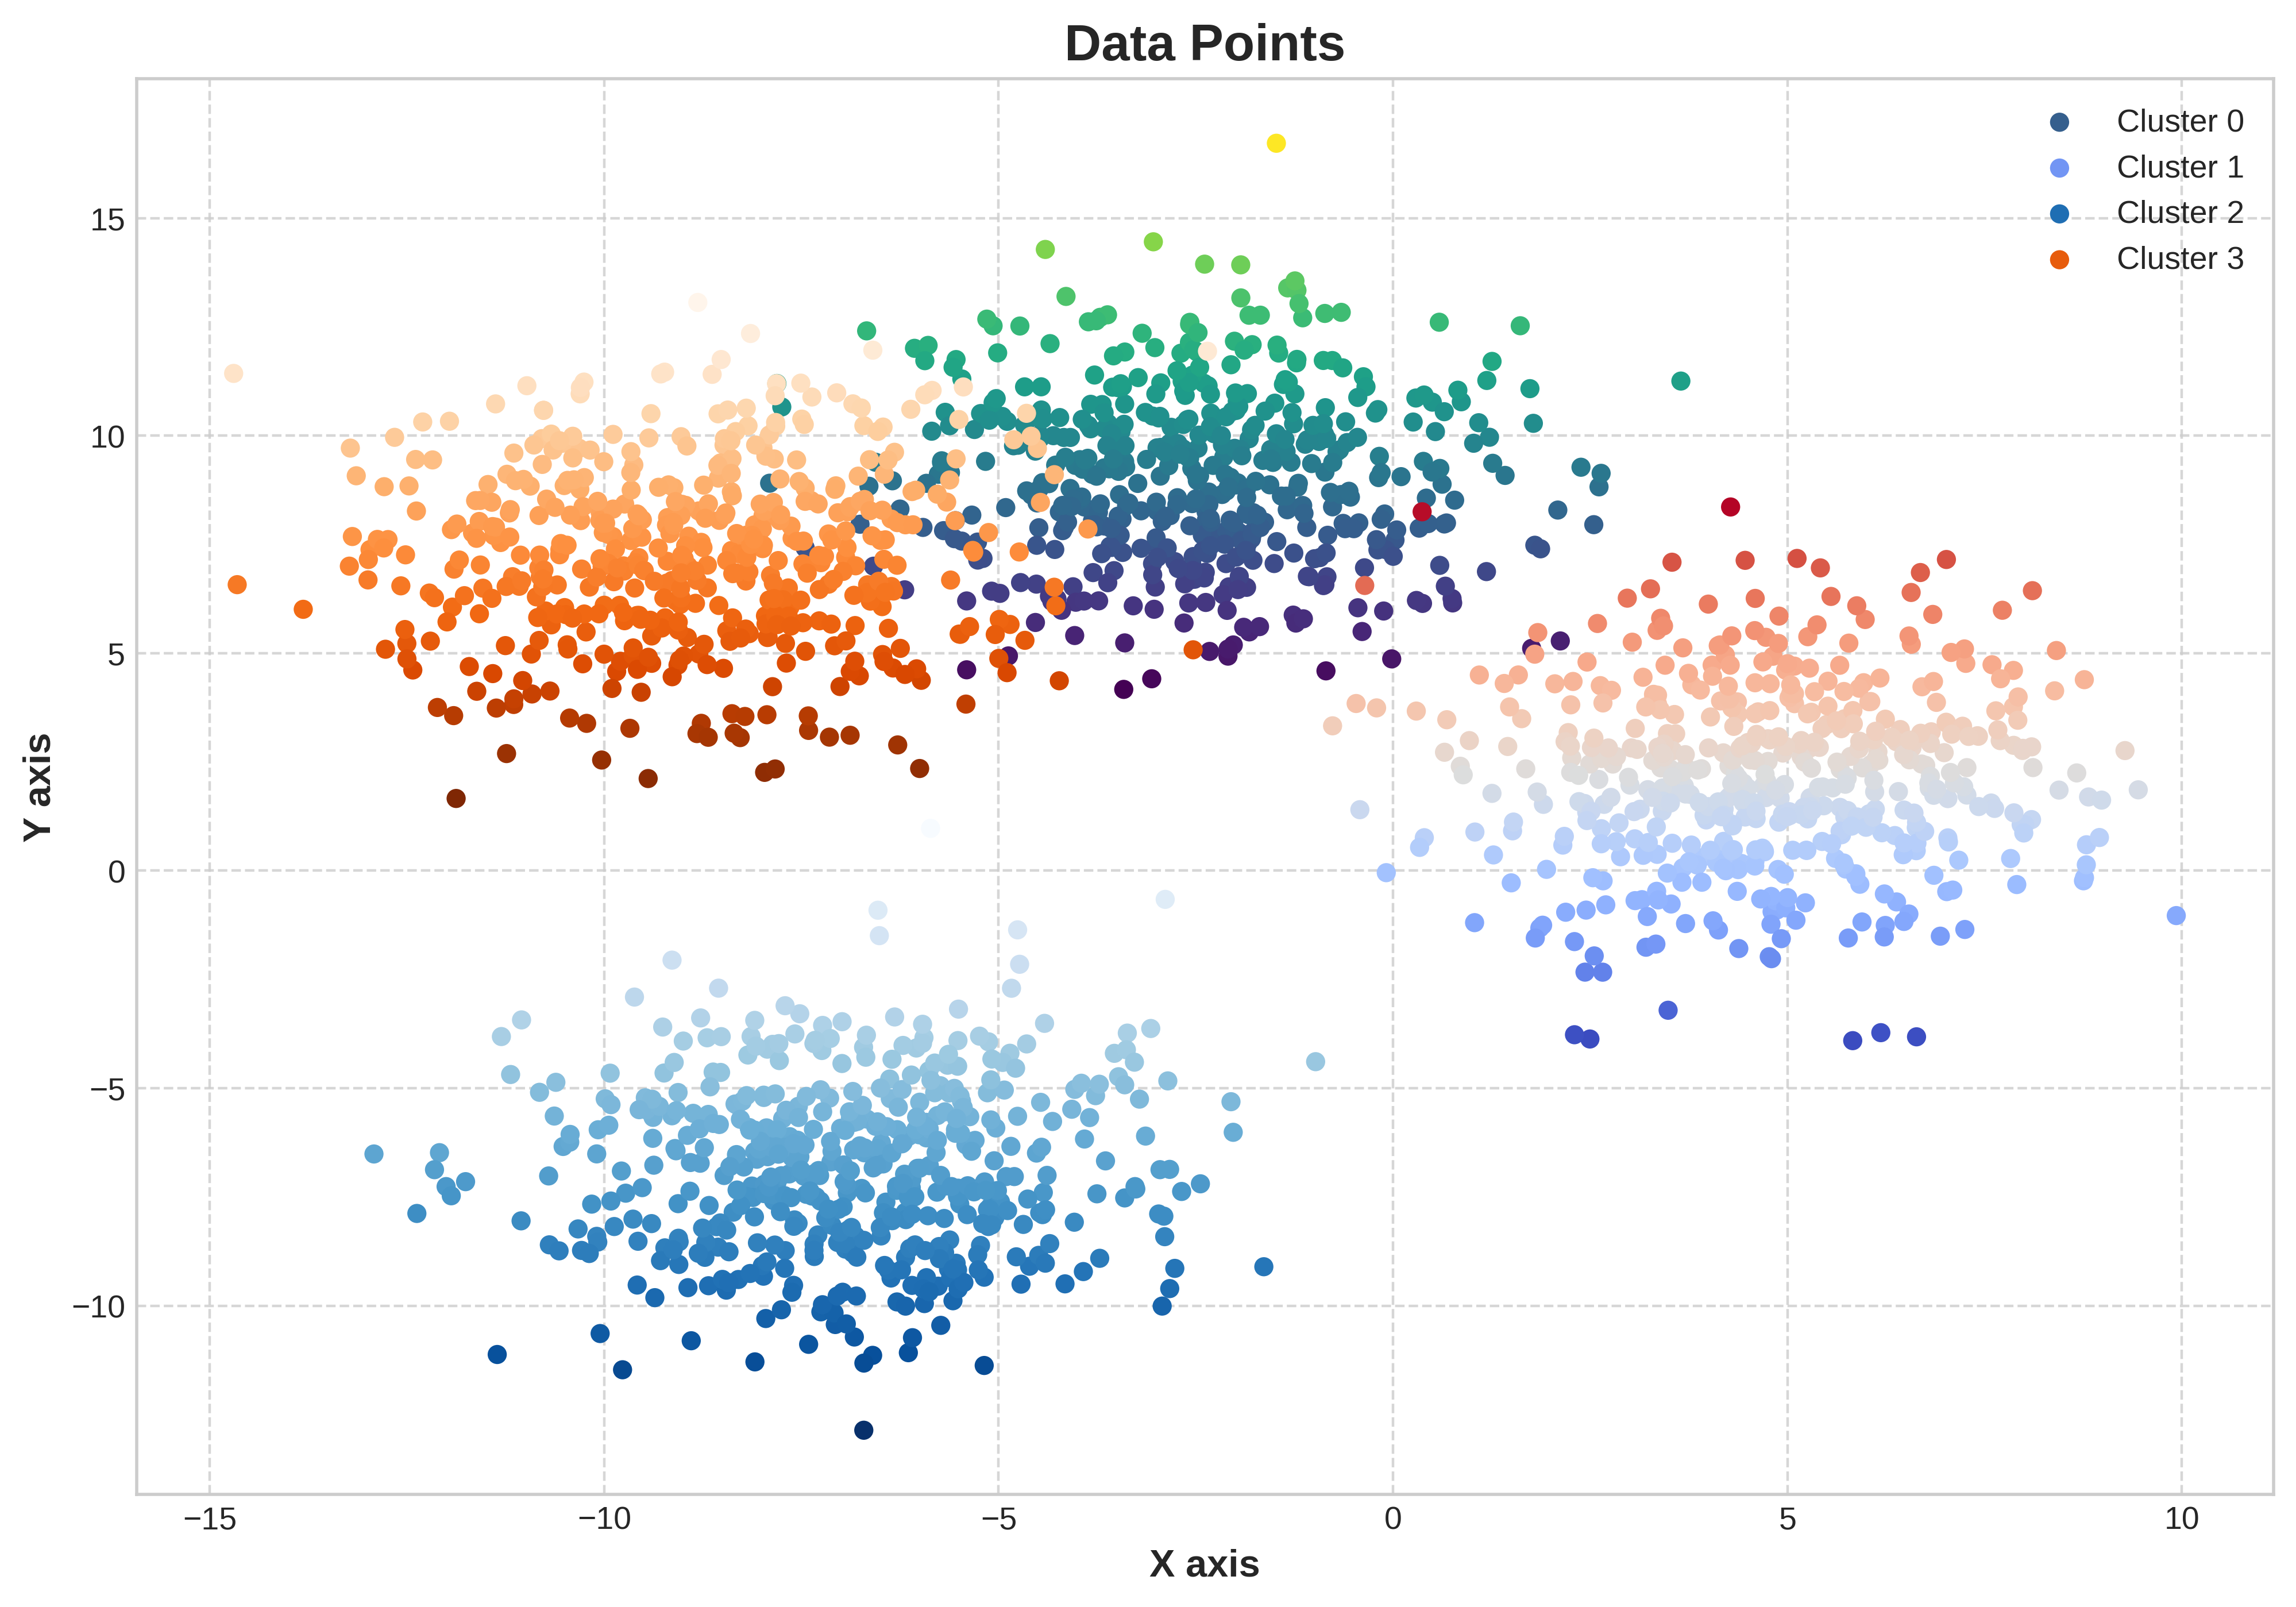

In [6]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X, Y = make_blobs(n_samples=2000, cluster_std=2, n_features=2, centers=4, random_state=42)

# Create DataFrame with labels
data = pd.DataFrame(np.column_stack((X, Y)), columns=["X1", "X2", "Y"])
display(data)
data["Y"] = data["Y"].astype(int)  # Ensure Y is int for indexing

# Plotting
plt.style.use("seaborn-v0_8-whitegrid")
colors = [plt.cm.viridis, plt.cm.coolwarm, "Blues_r", "Oranges_r"]
fig, ax = plt.subplots(figsize=(12, 8), dpi=400)

for label, group in data.groupby("Y"):
    ax.scatter(group["X1"], group["X2"], 
                label=f"Cluster {label}", 
                c=group["X2"], 
                cmap=colors[label], 
                edgecolors='none', 
                alpha=1)
    
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.title("Data Points", fontsize=16, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()


### Functions For KNN

In [7]:
def euclidian(X, Y):
    dist = np.sqrt((X[0] - Y[0])**2 + (X[1] - Y[1])**2)
    return dist

def KNNpoints(X, Y, point, K=4):
    nearest_points = []
    for i in range(len(X)):
        nearest_points.append([X[i], Y[i] ,euclidian(X[i], point)])
    nearest_points = sorted(nearest_points, key=lambda x: x[2])
    
    return nearest_points[:K]

def Moores_voting(arr):
    candidate = arr[0]
    count = 0
    for i in range(len(arr)):
        if count == 0:
            candidate = arr[i]
            count = 1
        elif arr[i] == candidate:
            count += 1
        elif arr[i] != candidate:
            count -=1
    
    count = 0
    for i in range(len(arr)):
        if arr[i] == candidate:
            count += 1
    
    if count>len(arr)/10:
        return candidate
    else:
        return arr[np.random.randint(0, len(arr)-1)]
            
def KNNvote(X, Y, point, K=4):
    nearest_points = KNNpoints(X, Y, point, K=K)
    nearest_classes = [nearest_points[i][1] for i in range(K)]
    return Moores_voting(nearest_classes)

KNNvote(X, Y, [1.2, 5], K=4)

np.int64(1)

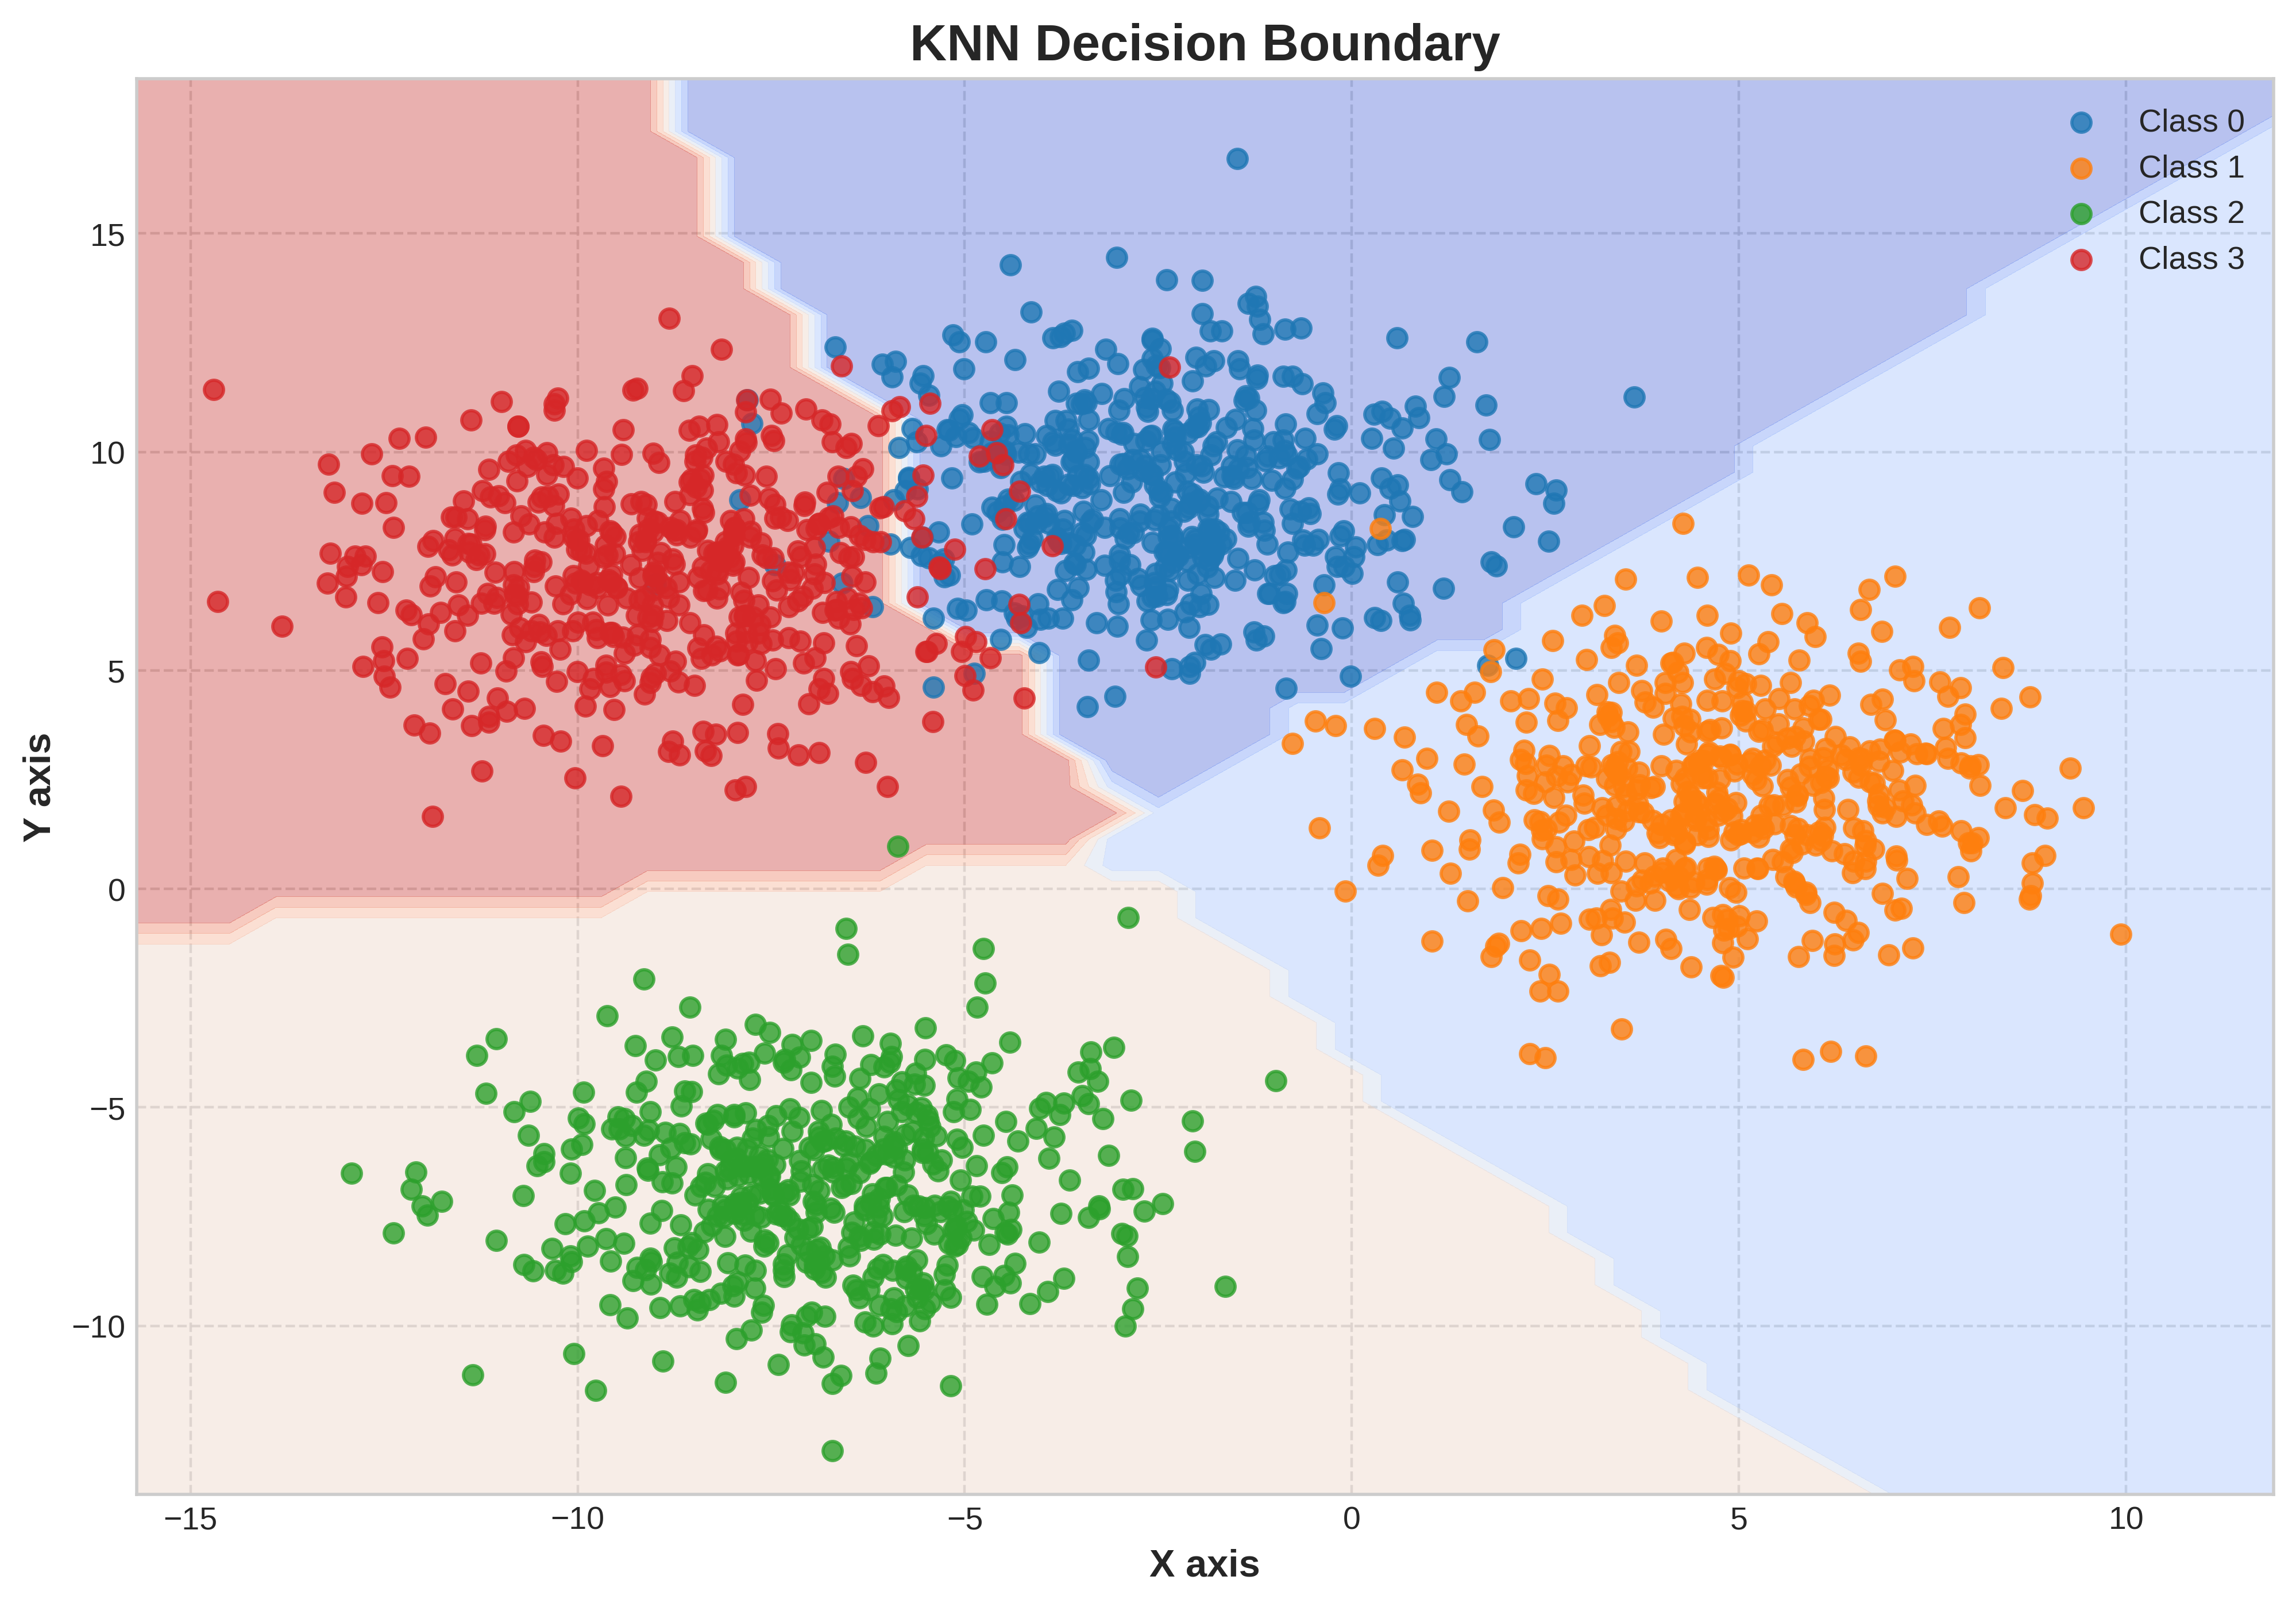

In [8]:
# Grid resolution
h = 0.6

# Determine bounds of the grid
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 2
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the grid
Z = np.array([KNNvote(X, Y, [x, y], K=10) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot decision boundary
fig, ax = plt.subplots(figsize=(12, 8), dpi=400)
ax.contourf(xx, yy, Z, alpha=0.4, cmap="coolwarm")

# Plot original points
for class_value in np.unique(Y):
    ax.scatter(X[Y == class_value, 0], X[Y == class_value, 1], label=f'Class {class_value}', alpha=0.8)

plt.title("KNN Decision Boundary", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()
